In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [29]:
df = pd.read_csv(r"C:\Users\surajsinh\Downloads\bank-additional-full.csv", sep=";")

In [30]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [31]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [33]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [34]:
#Since default feature is mostly "no" which is highly imbalanced, I also drop this feature.
df.drop("default",inplace=True,axis=1)

In [35]:
df.reset_index(inplace=True,drop=True)
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [36]:
# binary if were was an outcome of marketing campane
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [37]:
#There is also a issue in pdays feature. if the value is 999, then it will be replaced with a 0 which means that the client was not previously contacted
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [38]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"


In [39]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [40]:
#Encoding the remaining features
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

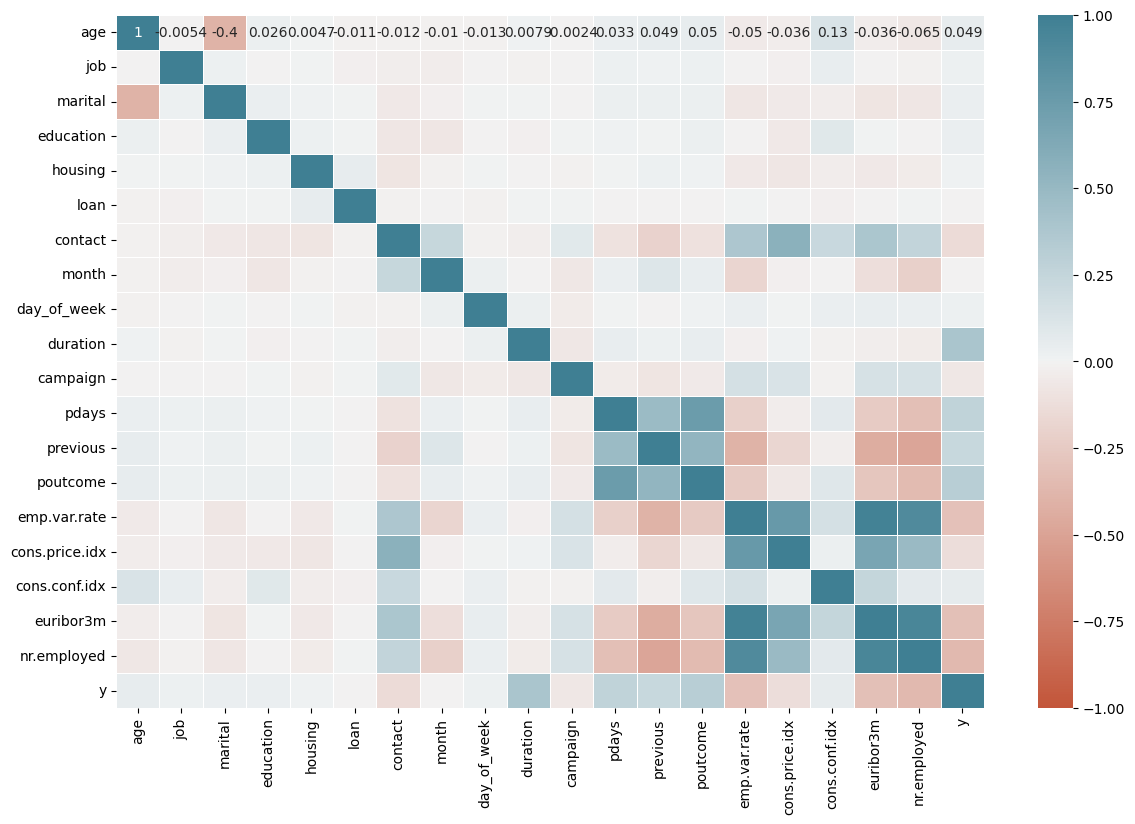

In [41]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

In [42]:
#Duration highly affects the output target (e.g., if duration=0 then y=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#Since pdays and previous features are correlated, I convert previous feature to categorical feature.

df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8')

In [43]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2,0,0,1,6,1,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,1,0,1,0,1,6,1,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,0,1,2,0,0,1,6,1,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,1,0,0,1,1,6,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,59,0,1,3,0,0,1,6,1,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, f1_score
from sklearn.linear_model import LogisticRegression

In [19]:
X = df.iloc[:,df.columns != 'y']
y = df.y
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)



In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit StandardScaler on training features
scaler.fit(X_train)

# Transform training and test features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_lm = LogisticRegression()
log_lm.fit(X_train, y_train)
logy_pred = log_lm.predict(X_test)
accuracy = accuracy_score(y_test, logy_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 90.28%


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

# Create StandardScaler instance
scaler = StandardScaler()

# Fit StandardScaler on training features
scaler.fit(X_train)

# Transform training and test features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = svm.SVC()
model.fit(X_train, y_train) 

# Make predictions on scaled test features
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 89.95%


In [28]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# Parameters to tune
parameters = {'C': [0.1, 1, 10], 
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}

# Create grid search object
clf_gs = GridSearchCV(svm.SVC(), parameters, cv=5)

# Fit on training data
clf_gs.fit(X_train, y_train) 

# Best parameters
print(clf_gs.best_params_)

# Best model
clf_best = clf_gs.best_estimator_

# Evaluate model on test set
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 89.97%


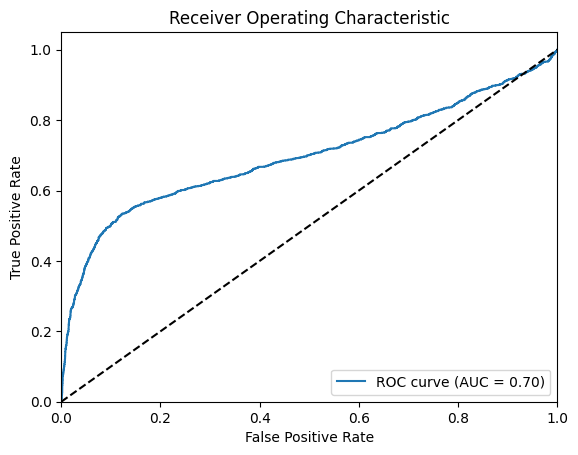

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities of the positive class
y_scores = model.decision_function(X_test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

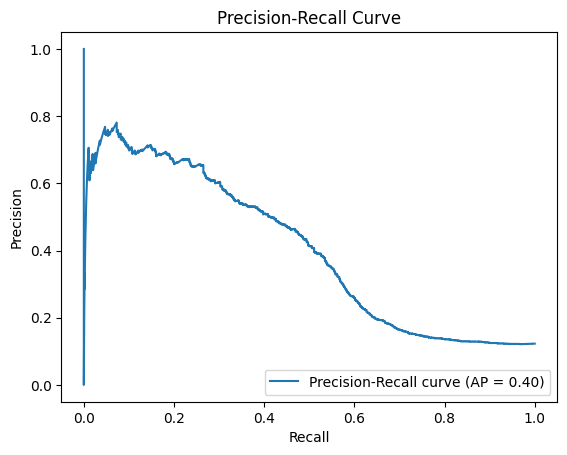

In [56]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2,0,0,1,6,1,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,1,0,1,0,1,6,1,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,0,1,2,0,0,1,6,1,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,1,0,0,1,1,6,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,59,0,1,3,0,0,1,6,1,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [45]:
columns_to_drop = ['duration', 'age', 'pdays']  # Add the column names you want to drop
df = df.drop(columns=columns_to_drop)

# Perform data preprocessing steps as before

# Split the data into training and test sets
X = df.iloc[:, df.columns != 'y']
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 89.22%


In [46]:
columns_to_drop = ['job']  # Add the column names you want to drop
df = df.drop(columns=columns_to_drop)

# Perform data preprocessing steps as before

# Split the data into training and test sets
X = df.iloc[:, df.columns != 'y']
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 89.19%
